In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')
from scipy import stats 
import seaborn as sns
from tqdm import tqdm
from itertools import combinations
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Case 1:  
    
У нас есть наблюдения по 4 группам. Необходимо придумать кейс, когда мы анализируем некий признак в 4 группах. Что это за группы? Какие выводы можно сделать понаблюдав за тем как распределены данные и что показывают у нас тесты?

In [2]:
df = pd.DataFrame([
    [25, 45, 30, 54],
    [30, 55, 29, 60],
    [28, 29, 33, 51],
    [36, 56, 37, 62],
    [29, 40, 27, 73]],
    columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


Нулевая гипотеза: A=B=C=D
Альтернативная гипотеза: !(A=B=C=D)
Результат: p = 0.00264%
отклоняем нулевую гипотезу
Полученное f-значение 17.4928


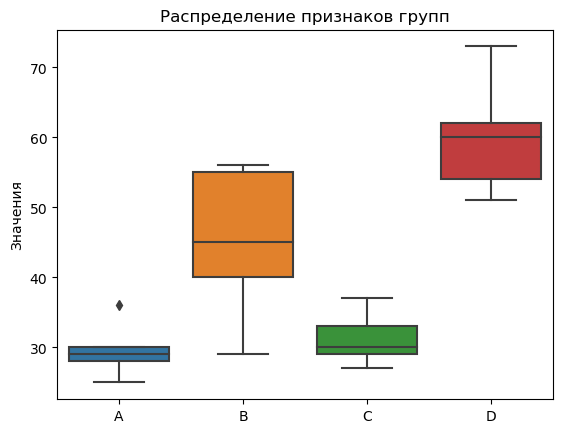

In [3]:
sns.boxplot(data=df, orient='v')
plt.title('Распределение признаков групп')
plt.ylabel('Значения')
print('Нулевая гипотеза:', '='.join(df))
print('Альтернативная гипотеза:', f'!({"=".join(df)})')
# общая средняя
grand_mean = df.values.flatten().mean()
# Общая сумма квадратов sst = ssb + ssw
sst = sum((val - grand_mean)**2 for val in df.values.flatten())
# отклонение групповых средний от общей средней
ssb = sum(df[group].size * (group_mean - grand_mean) ** 2 for group, group_mean in df.mean().items())
# отклонения значений внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in df[group]) for group, group_mean in df.mean().items())

groups = df.shape[1]
# Степени свободы
dfb = groups - 1
dfw = df.size - groups
# межгрупповой средний квадрат
mssb = ssb/dfb
# внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)
print(f'Результат: p = {p:.5%}')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')
print(f"Полученное f-значение {f_value:.4f}")

Попробуем вариант с другими библиотеками

In [4]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
df_melt.columns = ['index', 'treatments', 'value']
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


In [5]:
def f_test(df, *args, n=2, title=None):
    try:
        sns.boxplot(data=df, orient='v')
        plt.title(title)
        plt.ylabel('Значения')
    except:
        pass
    alpha = 0.05/((n*(n-1))/2)
    f, p = stats.f_oneway(*args)
    print('Нулевая гипотеза: все равны')
    print('Альтернативная гипотеза: какие-то не равны')
    print(f'Результат: p = {p:.5%}')
    if p < alpha:
        print('отклоняем нулевую гипотезу')
    else:
        print('НЕ отклоняем нулевую гипотезу')
    print(f"Полученное f-значение {f:.4f}")

Нулевая гипотеза: все равны
Альтернативная гипотеза: какие-то не равны
Результат: p = 0.00264%
отклоняем нулевую гипотезу
Полученное f-значение 17.4928


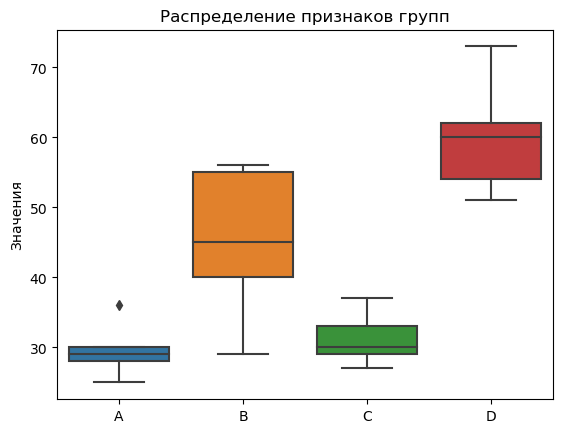

In [6]:
f_test(df, df['A'], df['B'], df['C'], df['D'], title='Распределение признаков групп')

Все три метода возвращают одинаковый результат

Тут может быть что угодно. Как вариант две группы с двумя подгруппами. Например время преодоления 100-метровки у мальчиков и девочек в старших и начальных классах.

#### Case 2: 
    
Есть некоторые данные об измерении раковины  у мидии Mytilus trossulus из пяти мест: 
Тилламук, Ньюпорт, Петербург, Аляска, Магадан и Твермин.
    
Осуществить дисперсионный анализ, визуализируйте данные. 
    
Если удастся визуально выделить данные в группы (например 2 города в одной, 3 в другой), сравнить выборки внутри полученных групп.   

In [7]:
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

In [8]:
cities = [tillamook , newport, petersburg, magadan, tvarminne]

In [9]:
mussels = pd.concat([pd.Series(i) for i in cities], axis=1)
mussels.columns = ['tillamook', 'newport' , 'petersburg', 'magadan', 'tvarminne']

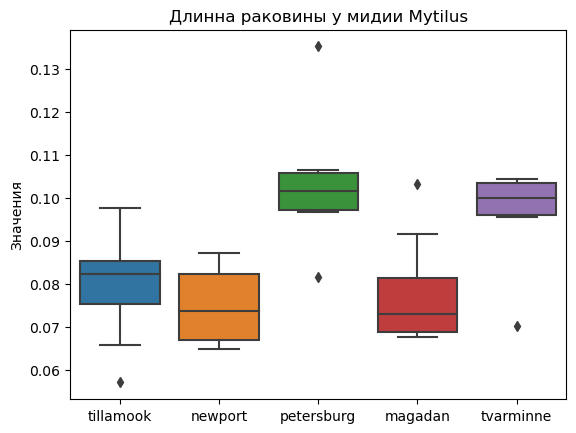

In [10]:
sns.boxplot(data=mussels, orient='v')
plt.title('Длинна раковины у мидии Mytilus')
plt.ylabel('Значения')
plt.show()

Тут выделяются две подгруппы:  
- tillamook , newport, magadan  
- petersburg, tvarminne

In [11]:
df1 = mussels[['tillamook', 'newport', 'magadan']].copy()
df2 = mussels[['petersburg', 'tvarminne']].copy()

Нулевая гипотеза: все равны
Альтернативная гипотеза: какие-то не равны
Результат: p = 61.21698%
НЕ отклоняем нулевую гипотезу
Полученное f-значение 0.5014


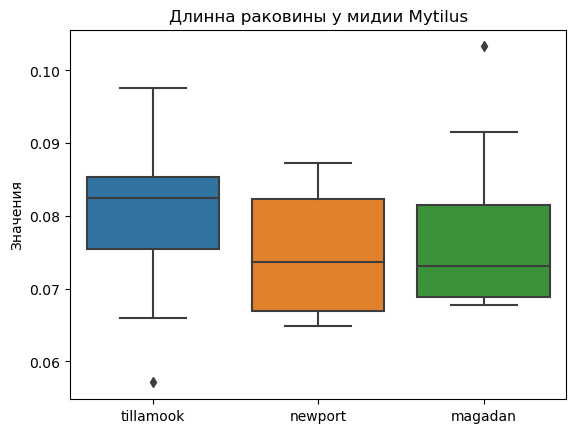

In [12]:
f_test(df1, tillamook, newport, magadan, title='Длинна раковины у мидии Mytilus')

Нулевая гипотеза: все равны
Альтернативная гипотеза: какие-то не равны
Результат: p = 36.79008%
НЕ отклоняем нулевую гипотезу
Полученное f-значение 0.8817


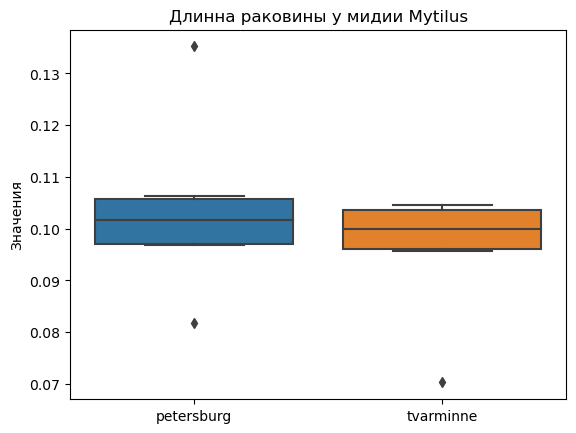

In [13]:
f_test(df2, petersburg, tvarminne, title='Длинна раковины у мидии Mytilus')

Как видно из тестов мидии в сгруппированных городах схожи

#### Case 3 
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.


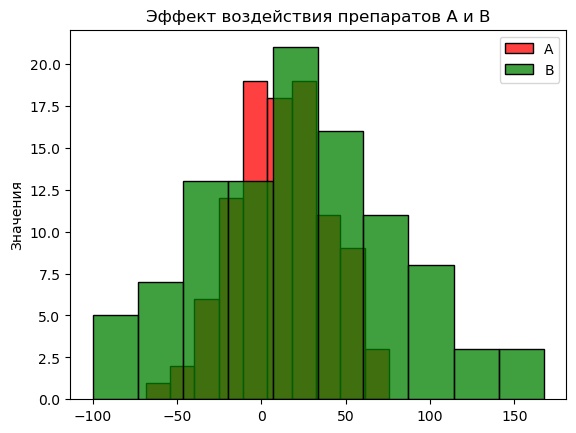

In [14]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

sns.histplot(pd.Series(A), color = 'r', bins=10)
sns.histplot(pd.Series(B), color = 'g', bins=10)
plt.title('Эффект воздействия препаратов A и B')
plt.ylabel('Значения')
plt.legend(labels=['A','B'])
plt.show()

In [15]:
def ttest_two(a, b, n=2, title=None):
    results = stats.ttest_ind(pd.Series(a), pd.Series(b), equal_var=False, alternative='two-sided')
    alpha = 0.05/((n*(n-1))/2)
    print(title)
    print(f'p-значение: {(results.pvalue):.3%}')
    if results.pvalue < alpha:
        print('Отклоняем нулевую гипотезу - различия есть')
    else:
        print('Недостаточно оснований отклонить нулевую гипотезу')

In [16]:
ttest_two(A, B, title='Гипотеза об эффекте для групп А и В, принимающих разные препараты\nH0 - различий нет\nH1 - различия есть')

Гипотеза об эффекте для групп А и В, принимающих разные препараты
H0 - различий нет
H1 - различия есть
p-значение: 8.511%
Недостаточно оснований отклонить нулевую гипотезу


Тут все понятно. Видимо на 2 группы препараты действуют одинаково

#### Case 4:
Даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат

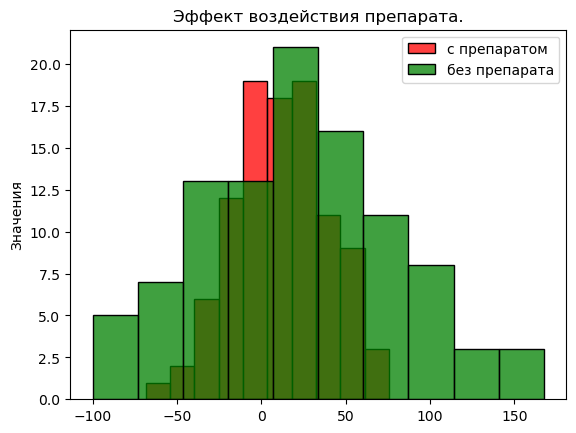

In [17]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)


sns.histplot(pd.Series(A), color = 'r', bins=10)
sns.histplot(pd.Series(B), color = 'g', bins=10)
plt.title('Эффект воздействия препарата.')
plt.ylabel('Значения')
plt.legend(labels=['с препаратом','без препарата'])
plt.show()

Проверим гипотезу бутстрапом. 
- посчитаем разницу средних показателей в группах А и В
- смешаем две группы, как будто никакого теста не проводим
- случайно будем выводить две группы по сто человек, делать замеры, считать разницу средних показателей и возвращать их обратно
- повторим такие замеры много раз и сравним ранее посчитанной разницей
- посчитаем сколько раз случайно полученная разница превысила фактическую и поделим на количество всех замеров
- полученная величина буде согласно ЗБЧ будет вероятностью получить такое или большее значение случайно, т.е. __p-value__

In [18]:
a = pd.Series(A).rename('value').to_frame()
b = pd.Series(B).rename('value').to_frame()
a['group'] = 'A'
b['group'] = 'B'
df3 = pd.concat([a,b])
df3.sample(3)

,value,group
88,-14.900575,A
88,76.692885,B
37,61.663792,B


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:10<00:00, 9722.83it/s]


Гипотеза об эффекте для группы А и В, принимающих препарат Х и не принимающих
H0 - различий нет
H1 - различия есть
p-значение: 8.451%
Недостаточно оснований отклонить нулевую гипотезу


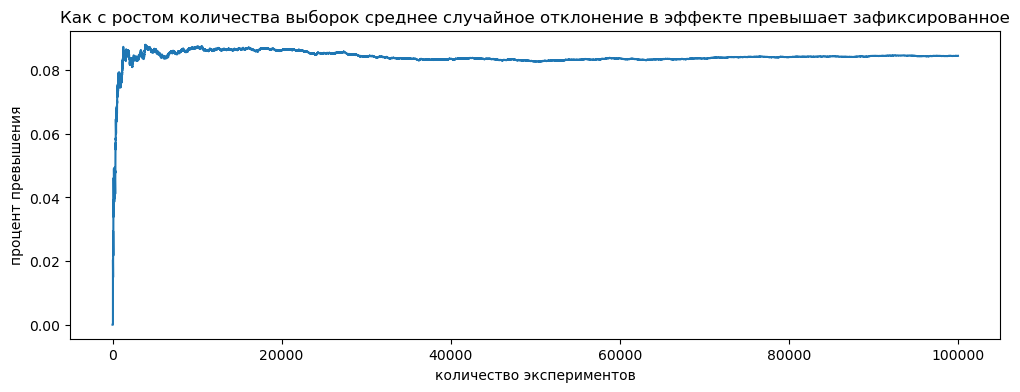

In [19]:
boot = []
diff = abs(pd.Series(A).mean() - pd.Series(B).mean())
n = 2
for i in tqdm(range(100000)):
    a_1 = (df3['value'].sample(len(A), replace=True).mean())
    b_1 = (df3['value'].sample(len(B), replace=True).mean())
    boot.append(abs(a_1 - b_1) >= diff)
p_val = pd.Series(boot).mean()
alpha = 0.05/((n*(n-1))/2)
print(f'Гипотеза об эффекте для группы А и В, принимающих препарат Х и не принимающих\nH0 - различий нет\nH1 - различия есть')
print(f'p-значение: {p_val:.3%}')
if p_val < alpha:
    print('Отклоняем нулевую гипотезу - различия есть')
else:
    print('Недостаточно оснований отклонить нулевую гипотезу')
    
plt.figure(figsize=(12,4))
(pd.Series(boot).cumsum() / (pd.Series(boot).index + 1)).plot()
plt.title('Как с ростом количества выборок среднее случайное отклонение в эффекте превышает зафиксированное')
plt.xlabel('количество экспериментов')
plt.ylabel('процент превышения')
plt.show()

Проверим еще и Ф-тестом

In [20]:
n = 2
alpha = 0.05/((n*(n-1))/2)
f, p = stats.f_oneway(A, B)
print('Нулевая гипотеза: все равны')
print('Альтернативная гипотеза: какие-то не равны')
print(f'Результат: p = {p:.5%}')
if p < alpha:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')
print(f"Полученное f-значение {f:.4f}")

Нулевая гипотеза: все равны
Альтернативная гипотеза: какие-то не равны
Результат: p = 8.45100%
НЕ отклоняем нулевую гипотезу
Полученное f-значение 3.0061


Все три показывают похожий результат

#### Case 5:
Дачный эксперимент. Поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, получить выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, отобразить отличия визуально с помощью `boxplot` или `hist`


In [21]:
n = 3

In [22]:
water = [1, 2, 3, 4, 2, 4, 2, 4, 5, 2, 3, 4, 2, 1, 3, 4, 3, 2, 5, 1]
nutri = [1, 2, 4, 6, 5, 6, 7, 5, 4, 5, 6, 7, 4, 3, 5, 5, 6, 5, 4, 3, 5]
mineral = [2, 1, 1, 3, 2, 4, 2, 4, 5, 4, 3, 2, 3, 2, 3, 1, 3, 4, 5, 1, 4]

# Ваш код.
types = [water , nutri, mineral]

In [23]:
df4 = pd.concat([pd.Series(i) for i in types], axis=1)
df4.columns = ['water', 'nutri' , 'mineral']
df4.dropna(inplace=True)

In [24]:
def anova_test(df, n=2, title=''):
    sns.boxplot(data=df, orient='v')
    plt.title(title)
    plt.ylabel('Значения')
    df.dropna(inplace=True)
    alpha = 0.05/((n*(n-1))/2)
    print('Нулевая гипотеза:', '='.join(df))
    print('Альтернативная гипотеза:', f'!({"=".join(df)})')
    grand_mean = df.values.flatten().mean()
    sst = sum((val - grand_mean)**2 for val in df.values.flatten())
    ssb = sum(df[group].size * (group_mean - grand_mean) ** 2 for group, group_mean in df.mean().items())
    ssw = sum(sum((x - group_mean)**2 for x in df[group]) for group, group_mean in df.mean().items())
    groups = df.shape[1]
    dfb = groups - 1
    dfw = df.size - groups
    mssb = ssb/dfb
    mssw = ssw/dfw
    f_value = mssb/mssw
    p = stats.f.sf(f_value, dfb, dfw)
    print(f'Результат: p = {p:.5%}')
    if p < alpha:
        print('отклоняем нулевую гипотезу')
    else:
        print('НЕ отклоняем нулевую гипотезу')
    print(f"Полученное f-значение {f_value}")

Сперва проверим равенство трех способов, потом отдельно какие-нибудь два

Нулевая гипотеза: water=nutri=mineral
Альтернативная гипотеза: !(water=nutri=mineral)
Результат: p = 0.00455%
отклоняем нулевую гипотезу
Полученное f-значение 11.974276527331194


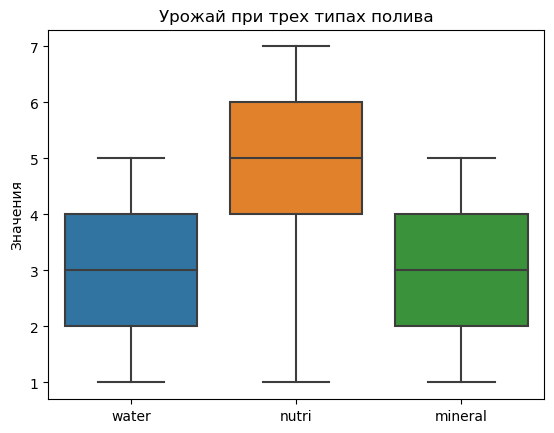

In [25]:
anova_test(df4, n=n, title= 'Урожай при трех типах полива')

In [26]:
ttest_two(water, mineral, n=n, title='Гипотеза об эффекте от полива минералкой и простой водой\nH0 - различий нет\nH1 - различия есть')

Гипотеза об эффекте от полива минералкой и простой водой
H0 - различий нет
H1 - различия есть
p-значение: 91.980%
Недостаточно оснований отклонить нулевую гипотезу


Если все три не равны согласно Ф-тесту, а Вода и минералка по Т-тесту равны, то __нутри__ уже можно не проверять. Он отличается от остальных

#### Case 6:
    
Проанализируем ещё один датасет. Здесь снова данные по урожайности в зависимости от типа используемого удобрения. 
    
Предлагаю самостоятельно исследовать данные и проверить гопотезы, используя тесты, изученные в течение курса
Допустим, вы должны помочь агроному выбрать тип удобрения. Какой вы посоветуете и почему? 


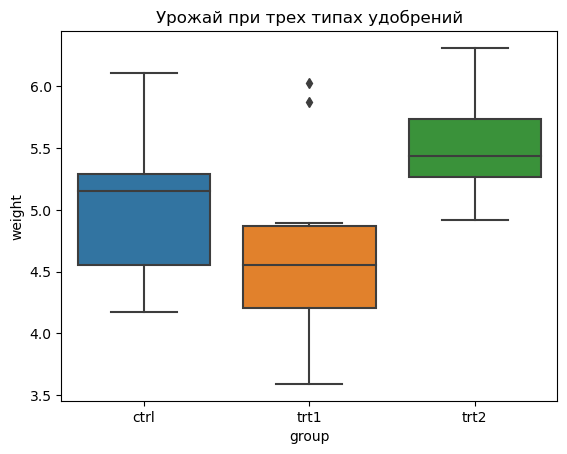

In [27]:
df5 = pd.read_csv('./data/PlantGrowth.csv', index_col=0)
sns.boxplot(y="weight", x='group', data=df5, orient='v')
plt.title('Урожай при трех типах удобрений')
plt.show()

Проверим на нормальность

p-значение для категории ctrl 74.74745%
	Не получилось отвергнуть нулевую гипотезу, распределение нормально
p-значение для категории trt1 45.19447%
	Не получилось отвергнуть нулевую гипотезу, распределение нормально
p-значение для категории trt2 56.42522%
	Не получилось отвергнуть нулевую гипотезу, распределение нормально


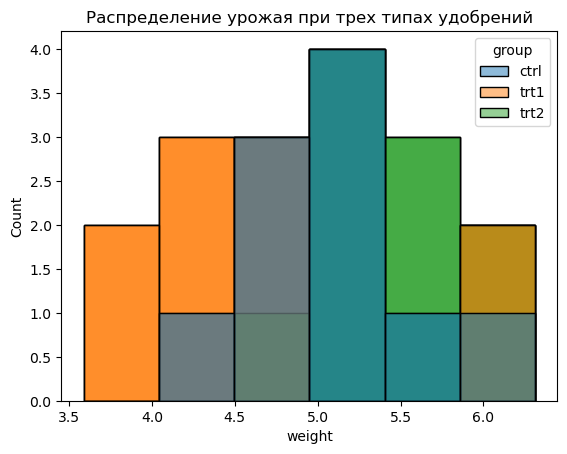

In [28]:
alpha = 0.05
for i in df5['group'].unique():
    sns.histplot(df5,  x='weight',  hue='group')
    plt.title('Распределение урожая при трех типах удобрений')
    results = stats.shapiro(df5.query('group == @i')['weight'])
    p_value = results[1]
    print(f'p-значение для категории {i} {p_value:.5%}')
    if p_value < alpha:
        print('\tОтвергаем нулевую гипотезу: распределение не нормально')
    else:
        print('\tНе получилось отвергнуть нулевую гипотезу, распределение нормально') 

Тест указывает что выборки распределены нормально, хотя этого не заметно. Наверно потому что мало данных. Если данных мало Т-тест может дать неверный результат. посчитаем все Манном-Уитни

Предварительно группируем удобрения в пары

In [29]:
pairs_of_categoryes = list(combinations(df5['group'].unique(), 2))
pairs_of_categoryes

[('ctrl', 'trt1'), ('ctrl', 'trt2'), ('trt1', 'trt2')]

In [30]:
def tester(df, a, b, n=3):
    alpha = 0.05/((n*(n-1))/2)
    res = stats.mannwhitneyu(df[df['group'] == a]['weight'], df[df['group'] == b]['weight'])
    print(f'Скорректированная альфа {alpha:.2f}')
    print(f'Гипотеза об эффекте от удобрения {a} и удобрения {b}\nH0 - различий нет\nH1 - различия есть')
    print('\tp-значение: {0:.3f}'.format(res.pvalue))
    if (res.pvalue < alpha):
        print("\tОтклоняем нулевую гипотезу - различия есть")
    else:
        print("\tНедостаточно оснований отклонить нулевую гипотезу")
    print()

In [31]:
for item in pairs_of_categoryes:
    tester(df5, item[0], item[1], n=3)

Скорректированная альфа 0.02
Гипотеза об эффекте от удобрения ctrl и удобрения trt1
H0 - различий нет
H1 - различия есть
	p-значение: 0.199
	Недостаточно оснований отклонить нулевую гипотезу

Скорректированная альфа 0.02
Гипотеза об эффекте от удобрения ctrl и удобрения trt2
H0 - различий нет
H1 - различия есть
	p-значение: 0.064
	Недостаточно оснований отклонить нулевую гипотезу

Скорректированная альфа 0.02
Гипотеза об эффекте от удобрения trt1 и удобрения trt2
H0 - различий нет
H1 - различия есть
	p-значение: 0.011
	Отклоняем нулевую гипотезу - различия есть



Если в магазине будут только __trt1__ и __trt2__ - пусть однозначно берет __trt2__   
Если не будет этого можно __ctrl__ либо __trt1__, но там не понятно какое лучше, пусть по цене ориентируется

# AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [33]:
pokemon = pd.read_csv('./data/pokemon.csv')  # Откроем датасет
pokemon.head()
# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.
pokemon.columns = [i.lower().replace(' ', '_') for i in pokemon.columns]
pokemon

,pid,name,class_1,class_2,hp,attack,defense,sp._atk,sp._def,speed,legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


#### Case 6:
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

У нас предполагается 4 тестов на одном датасете и 1 на сравнение доверительного интервала

In [34]:
n = 4

In [35]:
pokemon[['class_1', 'class_2']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   class_1  800 non-null    object
 1   class_2  414 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB


В __class_2__ очень много пропусков

In [36]:
pokemon.groupby('name').agg({'class_1':lambda x: x.count() > 1}).sum()

class_1    0
dtype: int64

Покемоны в классах не дублируются

In [37]:
df7 = pokemon[pokemon['class_1'].str.contains('grass|rock', case=False)][['class_1', 'attack']]
df7['class_1'].value_counts()

Grass    70
Rock     44
Name: class_1, dtype: int64

p-значение для категории Grass 24.67673%
	Не получилось отвергнуть нулевую гипотезу, распределение нормально
p-значение для категории Rock 10.66181%
	Не получилось отвергнуть нулевую гипотезу, распределение нормально


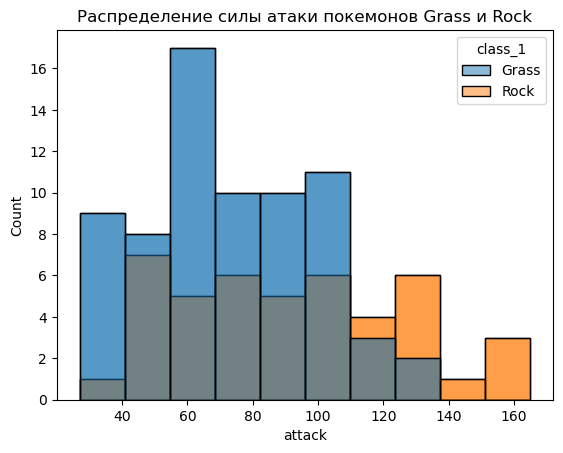

In [38]:
alpha = 0.05
for i in df7['class_1'].unique():
    sns.histplot(data=df7, x='attack', hue='class_1', bins=10)
    plt.title('Распределение силы атаки покемонов Grass и Rock')
    results = stats.shapiro(df7.query('class_1 == @i')['attack'])
    p_value = results[1]
    print(f'p-значение для категории {i} {p_value:.5%}')
    if p_value < alpha:
        print('\tОтвергаем нулевую гипотезу: распределение не нормально')
    else:
        print('\tНе получилось отвергнуть нулевую гипотезу, распределение нормально') 

In [39]:
a = df7[df7['class_1'] == 'Grass']['attack']
b = df7[df7['class_1'] == 'Rock']['attack']
(a.mean(), b.mean())

(73.21428571428571, 92.86363636363636)

In [40]:
def ttest_one(a, b, n=2, title = ''):
    print(title)
    alpha = 0.05/((n*(n-1))/2)
    results = stats.ttest_1samp(a, b.mean())
    # тест односторонний: p-value будет в два раза меньше
    print(f'p-значение:, {(results.pvalue / 2):.3%}')
    # тест односторонний вправо:
    # отвергаем гипотезу только тогда, когда среднее по классу Grass значимо больше среднего по классу Rock
    if (results.pvalue / 2 < alpha) and (a.mean() > b.mean()):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не отвергаем нулевую гипотезу") 

In [41]:
ttest_one(a, b, title = 'Гипотеза о том, что покемоны в классе Grass \nимеют более сильную обычную атаку, \nчем у покемонов в классе Rock\nH0 - не сильнее\nH1 - сильне')

Гипотеза о том, что покемоны в классе Grass 
имеют более сильную обычную атаку, 
чем у покемонов в классе Rock
H0 - не сильнее
H1 - сильне
p-значение:, 0.000%
Не отвергаем нулевую гипотезу


#### Case 8:
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

Тут тоже односторонний т-тест

In [42]:
df8 = pokemon[pokemon['class_1'].str.contains('Water|Normal', case=False)][['class_1', 'speed']]
df8['class_1'].value_counts()

Water     112
Normal     98
Name: class_1, dtype: int64

p-значение для категории Water 57.46780%
	Не получилось отвергнуть нулевую гипотезу, распределение нормально
p-значение для категории Normal 53.33344%
	Не получилось отвергнуть нулевую гипотезу, распределение нормально


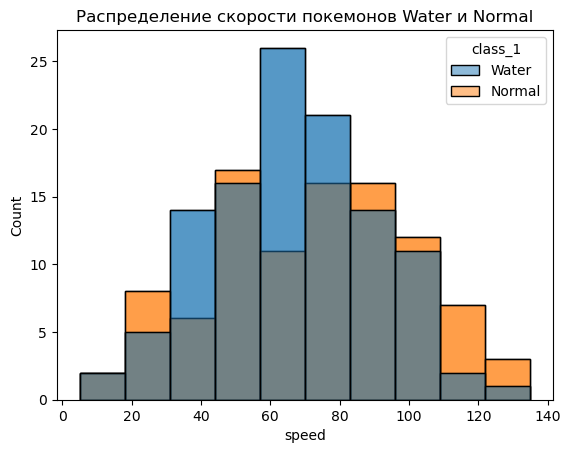

In [43]:
alpha = 0.05
for i in df8['class_1'].unique():
    sns.histplot(data=df8, x='speed', hue='class_1', bins=10)
    plt.title('Распределение скорости покемонов Water и Normal')

    results = stats.shapiro(df8.query('class_1 == @i')['speed'])
    p_value = results[1]
    print(f'p-значение для категории {i} {p_value:.5%}')
    if p_value < alpha:
        print('\tОтвергаем нулевую гипотезу: распределение не нормально')
    else:
        print('\tНе получилось отвергнуть нулевую гипотезу, распределение нормально') 

In [44]:
a = df8[df8['class_1'] == 'Water']['speed']
b = df8[df8['class_1'] == 'Normal']['speed']
(a.mean(), b.mean())

(65.96428571428571, 71.55102040816327)

In [45]:
ttest_one(a, b, n=n, title='Гипотеза о том, что покемоны в классе Water \nбыстрее чем покемоноы в классе Normal\nH0 -  не быстрее\nH1 - быстрее')

Гипотеза о том, что покемоны в классе Water 
быстрее чем покемоноы в классе Normal
H0 -  не быстрее
H1 - быстрее
p-значение:, 0.577%
Не отвергаем нулевую гипотезу


#### Case 9:
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

Для сравнения 4 тестовых покемонов со всеми остальными проверим попадает ли их средний замер в 99% доверительных интервал

In [46]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

In [47]:
untreathed = pokemon.query('name not in @treathed_pokemon')['speed']

In [48]:
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)
    return m-h, m, m+h

In [49]:
mean_confidence_interval(untreathed, confidence=0.99)

(65.27321288466368, 67.89195979899498, 70.51070671332627)

In [50]:
treathed = pokemon.query('name in @treathed_pokemon')['speed']
treathed.mean()

145.0

Покемоны с сывороткой в среднем быстрее чем границы 99% доверительного интервала скорости обычных покемонов

#### Case 10:
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

In [51]:
pokemon['summa'] = pokemon[['hp','attack', 'defense']].sum(axis=1)
pokemon['pover'] = pokemon[['hp','attack', 'defense']].prod(axis=1)

In [52]:
pokemon['legendary'].value_counts()

False    735
True      65
Name: legendary, dtype: int64

Тут очень большой перекос в легендарных и нет. Так же пойдем по пути доверительных интервалов и Ф-теста

In [53]:
def some_test(df, column, n=2):
    a = df[df['legendary'] == True][column]
    b = df[df['legendary'] != True][column]
    sns.boxplot(x="legendary", y=column, data=df)
    mci_a = mean_confidence_interval(a, confidence=0.99)
    mci_b = mean_confidence_interval(b, confidence=0.99)
    print(f'Доверительный интервал А - правый {mci_a[0]:.2f} средняя {mci_a[1]:.2f} левый {mci_a[2]:.2f}')
    print(f'Доверительный интервал B - правый {mci_b[0]:.2f} средняя {mci_b[1]:.2f} левый {mci_b[2]:.2f}')
    print()
    alpha = 0.05/((n*(n-1))/2)
    f, p = stats.f_oneway(a, b)
    print('Нулевая гипотеза: все равны')
    print('Альтернативная гипотеза: какие-то не равны')
    print(f'Результат: p = {p:.5%}')
    if p < alpha:
        print('отклоняем нулевую гипотезу')
    else:
        print('НЕ отклоняем нулевую гипотезу')
    print(f"Полученное f-значение {f:.4f}")

Доверительный интервал А - правый 293.80 средняя 309.08 левый 324.36
Доверительный интервал B - правый 208.28 средняя 214.41 левый 220.54

Нулевая гипотеза: все равны
Альтернативная гипотеза: какие-то не равны
Результат: p = 0.00000%
отклоняем нулевую гипотезу
Полученное f-значение 134.3710


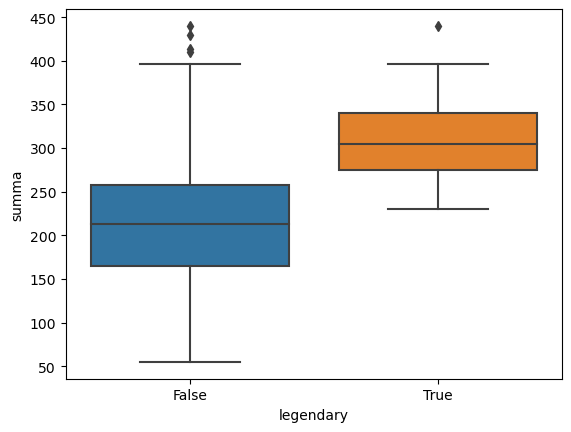

In [54]:
some_test(pokemon, 'summa', n=n)

Доверительный интервал А - правый 915779.63 средняя 1085941.62 левый 1256103.60
Доверительный интервал B - правый 389666.85 средняя 425041.39 левый 460415.93

Нулевая гипотеза: все равны
Альтернативная гипотеза: какие-то не равны
Результат: p = 0.00000%
отклоняем нулевую гипотезу
Полученное f-значение 175.9139


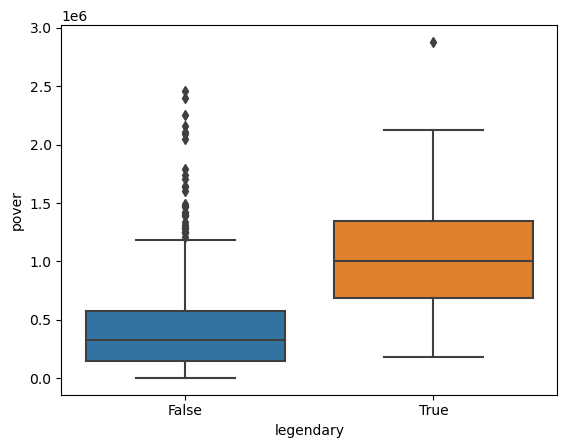

In [55]:
some_test(pokemon, 'pover', n=n)

Тут все понятно. Легендарные круче

#### Case 11:
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

In [56]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [57]:
df9 = pokemon.query('class_1 in @best_defence_class')[['class_1','defense']]

In [58]:
best_defence = [df9[df9['class_1'] == i]['defense'] for i in df9.class_1.unique()]

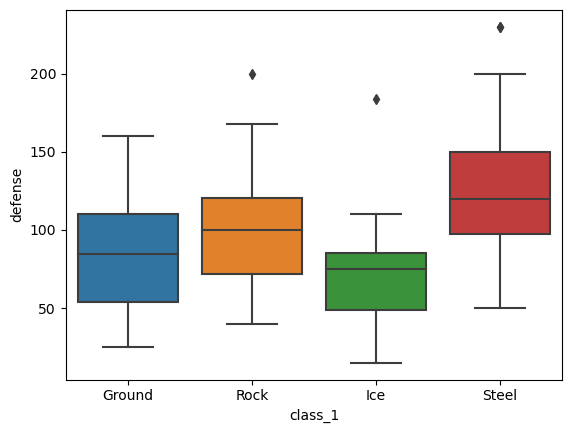

In [59]:
sns.boxplot(y="defense", x='class_1', data=df9, orient='v')
plt.show()

In [60]:
f_test(*best_defence, n=n)

Нулевая гипотеза: все равны
Альтернативная гипотеза: какие-то не равны
Результат: p = 0.00113%
отклоняем нулевую гипотезу
Полученное f-значение 12.9298


Некоторые из этих классов покемонов отличаются по уровню защиты статистически значимо